# XGBoost: eXtreme Gradient Boost
---
Sistema de mejora escalar de árboles

In [1]:
!pip install xgboost

In [2]:
# XGBoost
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import seaborn as sns

In [3]:
# Datos
df = pd.read_csv('diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
X, y = df.iloc[:,:-1].values, df.iloc[:, -1].values
# Entrnamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X.shape, X_train.shape, X_test.shape

((768, 8), (614, 8), (154, 8))

In [5]:
# Modelo
xgb = XGBClassifier() # Tiene muchos parámetros, pero es conveniente dejar los que trae por omisión
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Exactitud = ', accuracy_score(y_test, y_pred))

Exactitud =  0.7207792207792207


In [6]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(sklearn.base.ClassifierMixin, XGBModel)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |  
 |      max_depth :  typing.Optional[int]
 |  
 |          Maximum tree depth for base learners.
 |  
 |      max_leaves : typing.Optional[int]
 |  
 |          Maximum number of leaves; 0 indicates no limit.
 |  
 |      max_bin : typing.Optional[int]
 |  
 |          If using histogram-based algorithm, maximum number of bins per feature
 |  
 |      grow_policy : typing.Optional[str]
 |  
 |          Tree growing policy.
 |  
 |   

In [7]:
# XGBoost: Regresor
from sklearn import metrics
from xgboost import XGBRegressor

In [8]:
# atos
exe = pd.read_csv('exercise.csv')
exe.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3


In [9]:
cal = pd.read_csv('calories.csv')
cal.head(2) 

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0


In [10]:
# Combinamos ambos conjuntos
cal_df = pd.concat([exe, cal['Calories']], axis = 1)
cal_df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0


In [11]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: xlabel='Gender', ylabel='count'>

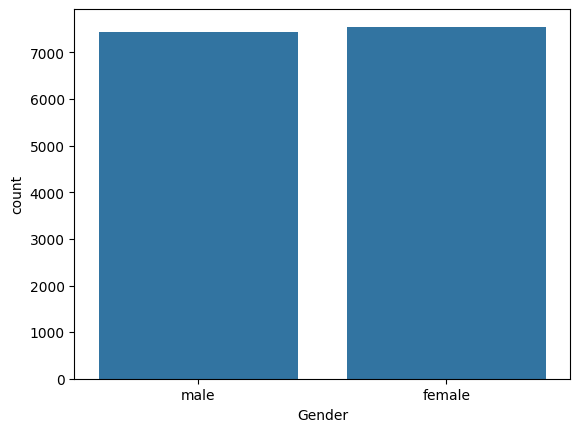

In [13]:
sns.countplot(x = cal_df.Gender)

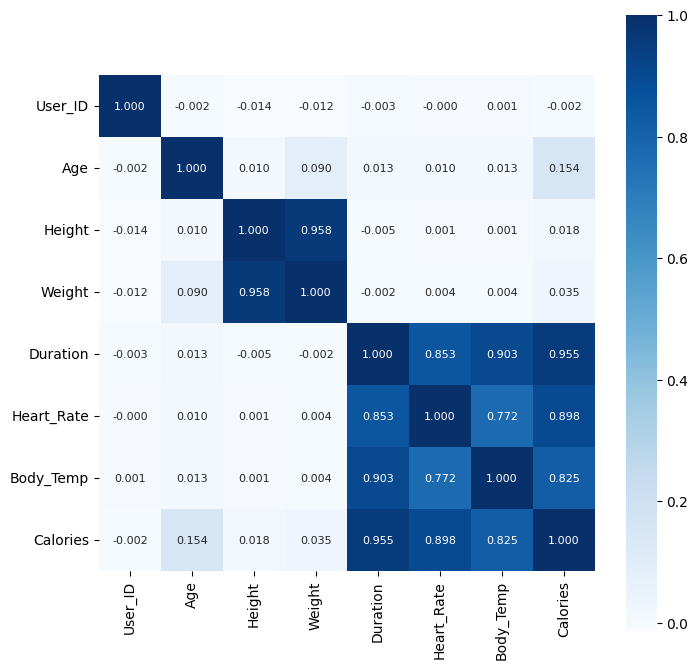

In [20]:
corr = cal_df.drop(['Gender'], axis = 1).corr()
plt.figure(figsize = (8, 8))
sns.heatmap(corr, cbar = True, square = True, fmt = '.3f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')
plt.show()

In [21]:
cal_df.replace({'Gender': {'male': 0, 'female': 1}}, inplace = True)
cal_df.head(3)

/tmp/ipykernel_551/473101406.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cal_df.replace({'Gender': {'male': 0, 'female': 1}}, inplace = True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0


In [24]:
X, y = cal_df.drop(['User_ID', 'Calories'], axis = 1).values, cal_df.Calories.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X.shape, X_train.shape, X_test.shape

((15000, 7), (12000, 7), (3000, 7))

In [25]:
# Modelo
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [26]:
# Evaluación
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' MAE = ', metrics.mean_absolute_error(y_test, y_pred))

RMSE =  2.1375116634132594
 MAE =  1.4981198125282924


### **Tarea**: Obtener regresión lineal, polinomial, KNN, y compara los resultados con el dataset anterior.

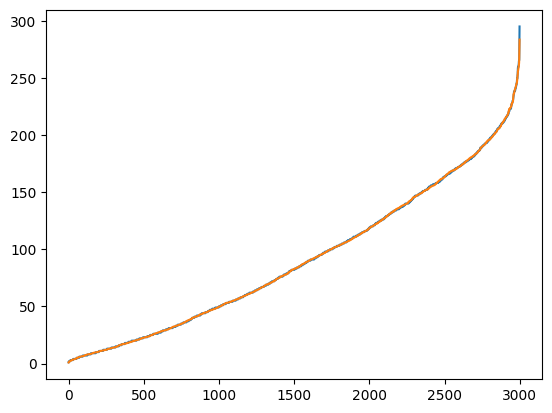

In [27]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(y_pred))
plt.show()